KNN Hyperparameter Tuning: Find Best k with GridSearchCV
This activity uses the Iris dataset to find the optimal n_neighbors (k) value using GridSearchCV with a Pipeline that includes scaling. Perfect for seeing cross-validation in action!

In [42]:
# Step 1: Setup and load data
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (120, 4)
Test set: (30, 4)


In [43]:
# Step 2: Build Pipeline with Scaling + KNN

# Create pipeline: Scale → KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define k values to test (1 to 20)
param_grid = {'knn__n_neighbors': range(1, 31, 2)}  # Odd values only

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best k:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_.round(3))

Best k: {'knn__n_neighbors': 19}
Best CV Accuracy: 0.958


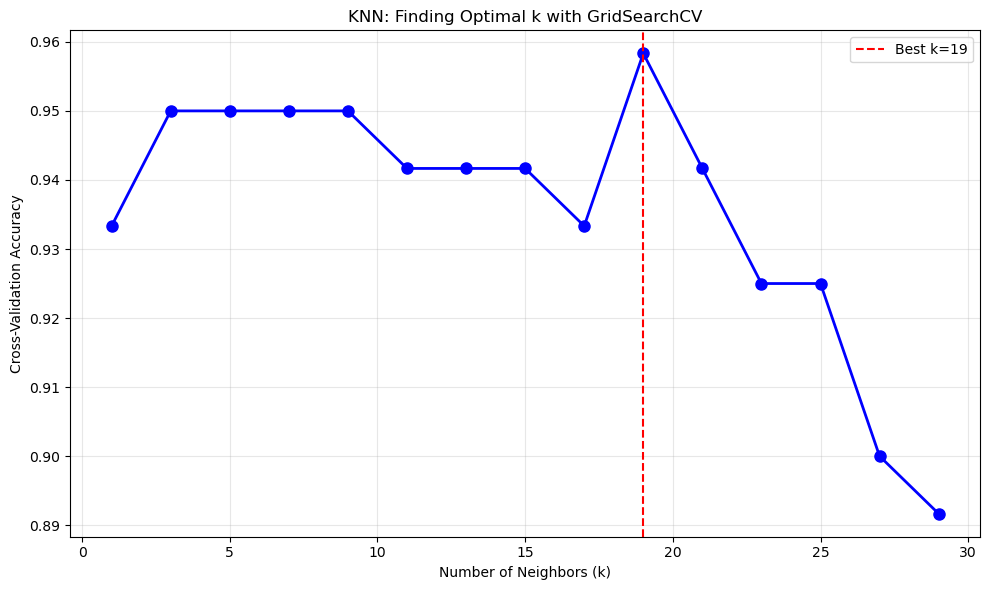

In [44]:
# Step 3: Visualize CV Results (Find the "Elbow")

# Extract CV results for plotting
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results['k'] = cv_results['param_knn__n_neighbors'].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(cv_results['k'], cv_results['mean_test_score'], 'bo-', linewidth=2, markersize=8)
plt.axvline(grid_search.best_params_['knn__n_neighbors'], color='red', linestyle='--', 
            label=f'Best k={grid_search.best_params_["knn__n_neighbors"]}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Finding Optimal k with GridSearchCV')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Step 4: Compare Best vs Worst Models

# Best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)

# Worst model (k=1, overfitting)
worst_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])
worst_model.fit(X_train, y_train)
y_pred_worst = worst_model.predict(X_test)
worst_acc = accuracy_score(y_test, y_pred_worst)

print("Test Set Results:")
print(f"Best k={grid_search.best_params_['knn__n_neighbors']}: {best_acc:.3f}")
print(f"Worst k=1: {worst_acc:.3f}")
print(f"Improvement: {((best_acc-worst_acc)/worst_acc*100):.1f}%")

Test Set Results:
Best k=19: 0.967
Worst k=1: 0.967
Improvement: 0.0%


In [46]:
# Step 5: Detailed Performance of Best Model

print("\nBest Model Detailed Report:")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

# All k values ranked by CV score
top_5 = cv_results.nlargest(5, 'mean_test_score')[['param_knn__n_neighbors', 'mean_test_score', 'std_test_score']]
print("\nTop 5 k values (CV Accuracy ± Std):")
print(top_5.round(3))


Best Model Detailed Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Top 5 k values (CV Accuracy ± Std):
   param_knn__n_neighbors  mean_test_score  std_test_score
9                      19            0.958           0.056
1                       3            0.950           0.067
2                       5            0.950           0.067
3                       7            0.950           0.067
4                       9            0.950           0.067
